In [1]:
import pandas as pd

# 数据加载 parse_dates自动转换时间格式
data = pd.read_csv('user_balance_table.csv',parse_dates=['report_date'])
data

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
0,1,2014-08-05,20385,20383,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
1,1,2014-08-08,20391,20389,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
2,1,2014-08-11,20397,20395,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
3,1,2014-08-14,20403,20401,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
4,1,2014-08-17,20409,20407,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840416,28033,2014-08-25,550646,550585,61,0,0,0,0,0,0,0,0,61,NaN,NaN,NaN,NaN
2840417,28033,2014-08-31,525707,538147,60,0,0,0,12500,12500,0,0,0,60,0.0,0.0,0.0,12500.0
2840418,28033,2014-07-24,20487121,20484824,2297,0,0,0,0,0,0,0,0,2297,NaN,NaN,NaN,NaN
2840419,28033,2014-07-27,20462288,20491722,2298,0,0,0,31732,0,31732,0,31732,2298,NaN,NaN,NaN,NaN


In [2]:
total_balance = data.groupby('report_date')['total_purchase_amt','total_redeem_amt'].sum()
total_balance

<ipython-input-2-188ca9d35da2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_balance = data.groupby('report_date')['total_purchase_amt','total_redeem_amt'].sum()


,total_purchase_amt,total_redeem_amt
report_date,,
2013-07-01,32488348,5525022
2013-07-02,29037390,2554548
2013-07-03,27270770,5953867
2013-07-04,18321185,6410729
2013-07-05,11648749,2763587
...,...,...
2014-08-27,302194801,468164147
2014-08-28,245082751,297893861
2014-08-29,267554713,273756380


In [3]:
purchase = total_balance[['total_purchase_amt']]
redeem = total_balance[['total_redeem_amt']]
redeem

,total_redeem_amt
report_date,
2013-07-01,5525022
2013-07-02,2554548
2013-07-03,5953867
2013-07-04,6410729
2013-07-05,2763587
...,...
2014-08-27,468164147
2014-08-28,297893861
2014-08-29,273756380


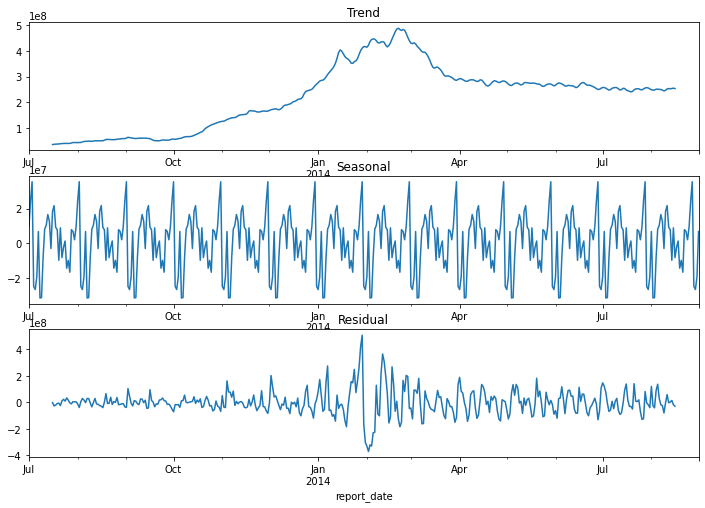

In [4]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
# 对指定区间范围内的数据，进行可视化
def plot_stl(data):
    # STL返回三个部分：trend(趋势)，seasonal(季节)，residual(残差)
    result = sm.tsa.seasonal_decompose(data, period=30)
    # 可视化
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)
    
    result.trend.plot(ax=ax1, title='Trend')
    result.seasonal.plot(ax=ax2,title='Seasonal')
    result.resid.plot(ax=ax3,title='Residual')

plot_stl(purchase.total_purchase_amt)

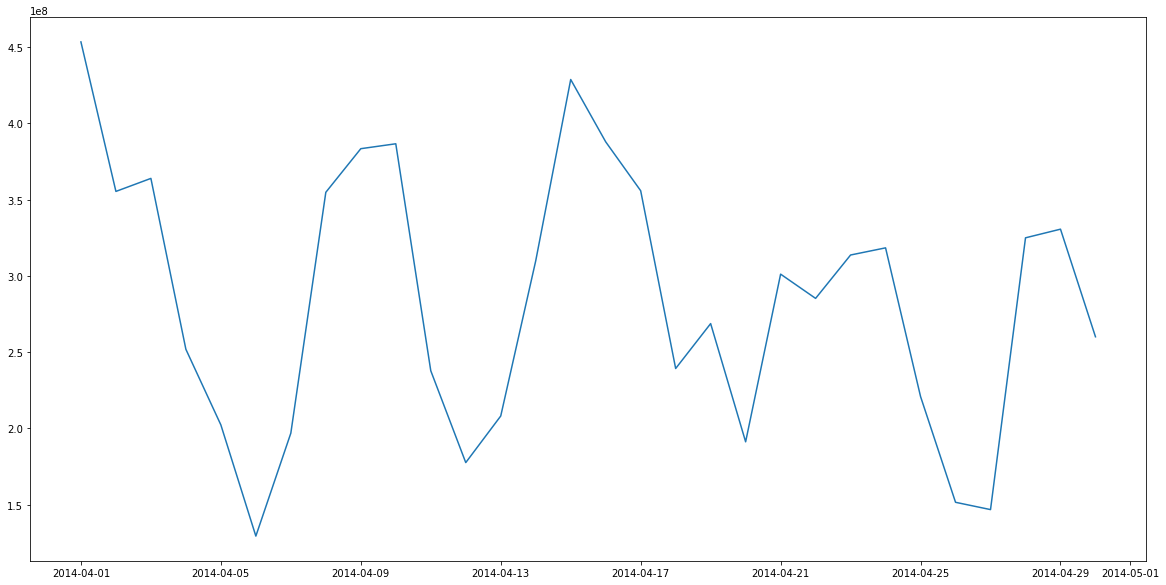

In [10]:
purchase2 = purchase[(purchase.index >= '2014-04-01') & (purchase.index <= '2014-04-30')]
# 画出走势图
plt.figure(figsize=(20, 10))
plt.plot(purchase2.total_purchase_amt)
date_range = pd.date_range('2014-04-01','2014-04-30')
# plt.xticks(date_range, rotation=90)

In [11]:
# 看时间序列的平稳性
from statsmodels.tsa.stattools import adfuller
t = adfuller(purchase['total_purchase_amt'])
t

(-1.5898802926313496,
 0.48867497513759334,
 18,
 408,
 {'1%': -3.446479704252724,
  '5%': -2.8686500930967354,
  '10%': -2.5705574627547096},
 15960.28197033403)

-1.5898..比10%的还要大，所以不能拒绝原假设，所以，差分

In [12]:
diff1 = purchase.diff(1)
t = adfuller(diff1[1:])
t

(-7.947102224652337,
 3.198186862488301e-12,
 18,
 407,
 {'1%': -3.4465195891135845,
  '5%': -2.8686676281678634,
  '10%': -2.5705668101226085},
 15918.844657651942)

In [16]:
from statsmodels.tsa.arima_model import ARIMA
# p,d,q其中d=1
model = ARIMA(purchase, order=(7,1,5)).fit()
# 使用typ='levels' 对原始数据维度上进行预测，相当于进行了反差分
purchase_pred = model.predict('2014-09-01','2014-09-30', typ = 'levels')
purchase_pred

d:\学习\研究生\算法工程师\Bi\Bi_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
d:\学习\研究生\算法工程师\Bi\Bi_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


2014-09-01    3.310533e+08
2014-09-02    3.318762e+08
2014-09-03    3.338908e+08
2014-09-04    2.983202e+08
2014-09-05    2.407518e+08
2014-09-06    2.266145e+08
2014-09-07    2.435559e+08
2014-09-08    2.970859e+08
2014-09-09    3.321273e+08
2014-09-10    3.265198e+08
2014-09-11    2.916847e+08
2014-09-12    2.392714e+08
2014-09-13    2.253553e+08
2014-09-14    2.475291e+08
2014-09-15    2.950930e+08
2014-09-16    3.345005e+08
2014-09-17    3.280821e+08
2014-09-18    2.927104e+08
2014-09-19    2.448979e+08
2014-09-20    2.275716e+08
2014-09-21    2.530229e+08
2014-09-22    2.980714e+08
2014-09-23    3.366740e+08
2014-09-24    3.321950e+08
2014-09-25    2.947112e+08
2014-09-26    2.505394e+08
2014-09-27    2.318276e+08
2014-09-28    2.574469e+08
2014-09-29    3.025697e+08
2014-09-30    3.387011e+08
Freq: D, dtype: float64

In [18]:
from statsmodels.tsa.arima_model import ARIMA
# p,d,q其中d=1
model2 = ARIMA(redeem, order=(7,1,5)).fit()
# 使用typ='levels' 对原始数据维度上进行预测，相当于进行了反差分
redeem_pred = model2.predict('2014-09-01','2014-09-30', typ = 'levels')
redeem_pred

d:\学习\研究生\算法工程师\Bi\Bi_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
d:\学习\研究生\算法工程师\Bi\Bi_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
d:\学习\研究生\算法工程师\Bi\Bi_env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2014-09-01    3.169695e+08
2014-09-02    3.372864e+08
2014-09-03    3.631589e+08
2014-09-04    3.073744e+08
2014-09-05    2.627309e+08
2014-09-06    2.259098e+08
2014-09-07    2.593021e+08
2014-09-08    3.116524e+08
2014-09-09    3.477937e+08
2014-09-10    3.561747e+08
2014-09-11    3.091838e+08
2014-09-12    2.597762e+08
2014-09-13    2.339488e+08
2014-09-14    2.579362e+08
2014-09-15    3.126721e+08
2014-09-16    3.537815e+08
2014-09-17    3.572977e+08
2014-09-18    3.145101e+08
2014-09-19    2.625816e+08
2014-09-20    2.387781e+08
2014-09-21    2.617507e+08
2014-09-22    3.158567e+08
2014-09-23    3.588732e+08
2014-09-24    3.610879e+08
2014-09-25    3.196666e+08
2014-09-26    2.671166e+08
2014-09-27    2.433172e+08
2014-09-28    2.662621e+08
2014-09-29    3.198686e+08
2014-09-30    3.636147e+08
Freq: D, dtype: float64

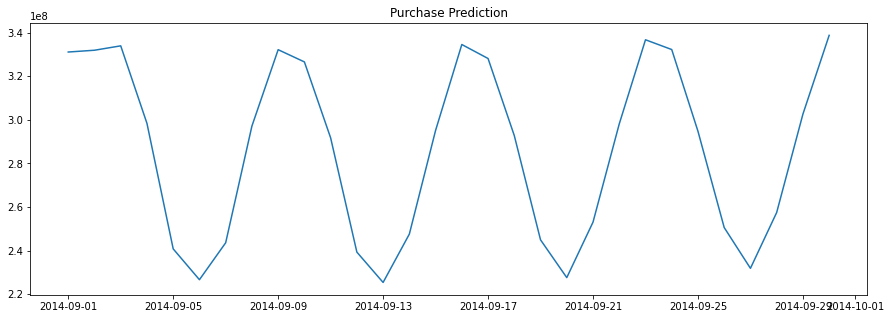

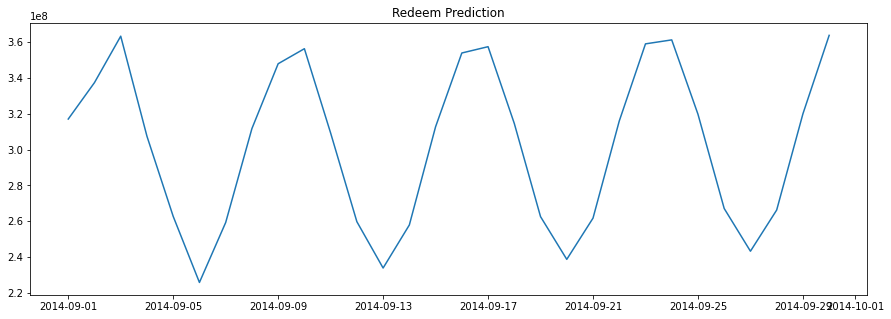

In [19]:
plt.figure(figsize=(15, 5))
plt.title('Purchase Prediction')
plt.plot(purchase_pred)
plt.show()

plt.figure(figsize=(15, 5))
plt.title('Redeem Prediction')
plt.plot(redeem_pred)
plt.show()

In [25]:
result = pd.DataFrame()
result['date'] = purchase_pred.index
result['purchase'] = purchase_pred.values
result['redeem'] = redeem_pred.values
result

,date,purchase,redeem
0,2014-09-01,3.310533e+08,3.169695e+08
1,2014-09-02,3.318762e+08,3.372864e+08
2,2014-09-03,3.338908e+08,3.631589e+08
3,2014-09-04,2.983202e+08,3.073744e+08
4,2014-09-05,2.407518e+08,2.627309e+08
5,2014-09-06,2.266145e+08,2.259098e+08
6,2014-09-07,2.435559e+08,2.593021e+08
7,2014-09-08,2.970859e+08,3.116524e+08
8,2014-09-09,3.321273e+08,3.477937e+08
9,2014-09-10,3.265198e+08,3.561747e+08


In [26]:
result['date'] = result['date'].apply(lambda x: str(x).replace('-','')[0:8])
result

,date,purchase,redeem
0,20140901,3.310533e+08,3.169695e+08
1,20140902,3.318762e+08,3.372864e+08
2,20140903,3.338908e+08,3.631589e+08
3,20140904,2.983202e+08,3.073744e+08
4,20140905,2.407518e+08,2.627309e+08
5,20140906,2.266145e+08,2.259098e+08
6,20140907,2.435559e+08,2.593021e+08
7,20140908,2.970859e+08,3.116524e+08
8,20140909,3.321273e+08,3.477937e+08
9,20140910,3.265198e+08,3.561747e+08


In [27]:
result.to_csv('arima.csv', header=None, index=False)